# Causal Graphical Models

In this section, we explore what are known as causal graphical models (CGM), which are essentially Bayesian networks where edges imply causal influence rather then just probabilistic dependence.

CGMs are assumed to be acyclic, meaning they do not have cycles among their variables.

In [22]:
import networkx as nx
from pywhy_graphs import ADMG

import matplotlib.pyplot as plt

## Causally Sufficient Models

Here, we don't have any latent variables. We demonstrate how a CGM works in code and what we can do with it.

We also demonstrate Clustered DAGs (CDAGs), which form from a cluster of variables, which is represented underneath the hood with two graphs. One consisting of all the variables denoting the cluster ID in the metadata, and another consisting of the graph between clusters. The first graph may be incompletely specified, since we do not require the edges within a cluster be fully specified.

Based on knowledge of CDAGs, we know that d-separation is complete.

In [23]:
dag = nx.MultiDiGraph()

In [63]:
dag.add_edge('A', 'B', key='direct')
dag.add_edge('A', 'B', key='bidirected')
dag.add_edge('B', 'A', key='bidirected')
dag.add_edge('C', 'B', key='direct')

'direct'

In [64]:
print(dag.edges)

[('A', 'B', 'direct'), ('A', 'B', 'bidirected'), ('B', 'A', 'bidirected'), ('C', 'B', 'direct')]


MultiDiGraph with 3 nodes and 4 edges


NetworkXError: graph should be directed acyclic

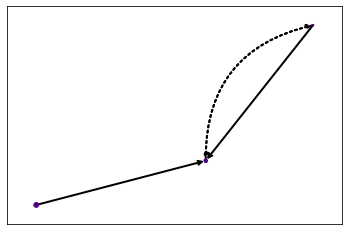

In [68]:
print(dag)
G = dag
pos = nx.random_layout(dag)
node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.viridis

# nx.draw_networkx(dag, pos=pos)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
directed_edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[('A', 'B', 'direct'), ('C', 'B', 'direct')],
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    # edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
    # connectionstyle="arc3,rad=0.1"
)
bd_edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[('A', 'B', 'bidirected')],
    node_size=node_sizes,
    style='dotted',
    # arrowstyle="->",
    arrowsize=10,
    # edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
    connectionstyle="arc3,rad=0.4"
)

bd_edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[('B', 'A', 'bidirected')],
    node_size=node_sizes,
    style='dotted',
    # arrowstyle="->",
    arrowsize=10,
    # edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
    connectionstyle="arc3,rad=-0.4"
)

# set alpha value for each edge
# for i in range(M):
    # edges[i].set_alpha(edge_alphas[i])

print(nx.d_separated(G, 'C', 'A', {}))

In [1]:
nodes = [
    'a', 'b', 'c', 'd', 'e'
]
cgm = ADMG(ebunch=nodes)

NameError: name 'ADMGicalModel' is not defined